In [19]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import numpy as np
from  torchvision import datasets, transforms
from tqdm import tqdm
from torch import nn

In [20]:
class MNIST_Logistic_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)
    def forward(self, x):
        return self.lin(x)

In [21]:
mnist_train = datasets.MNIST(root='./datasets', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root='./datasets', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [22]:
model = MNIST_Logistic_Regression()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [23]:
for images, labels in tqdm(train_loader):
    optimizer.zero_grad()

    x = images.view(-1, 28*28)
    y = model(x)
    loss = criterion(y, labels)
    loss.backward()
    optimizer.step()

100%|██████████| 600/600 [00:07<00:00, 84.06it/s]


In [24]:
correct = 0
total = len(mnist_test)
with torch.no_grad():
    for images, labels in tqdm(test_loader):
        x = images.view(-1, 28*28)
        y = model(x)
        pred = torch.argmax(y, dim=1)
        correct += torch.sum(pred == labels).float()
print(correct / total)

100%|██████████| 100/100 [00:01<00:00, 86.62it/s]

tensor(0.9035)


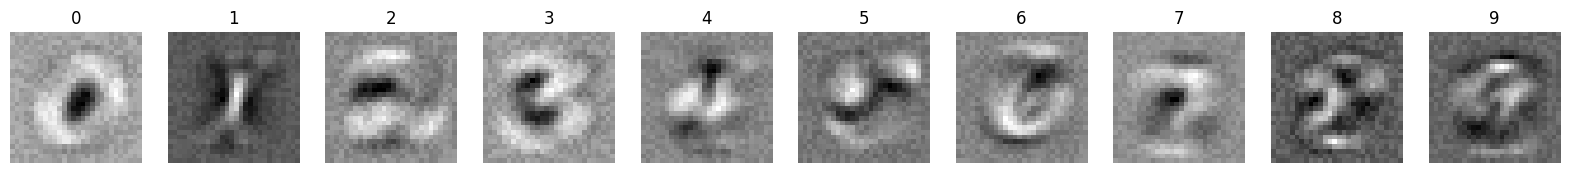

In [25]:
W = model.lin.weight.data
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(W[i].view(28,28), cmap='gray')
    ax[i].set_title(str(i))
    ax[i].axis('off')
plt.show()